In [ ]:
from google.colab import files
import pandas as pd
import io

# Read file by upload
upload_files = files.upload()
for filename in upload_files.keys():
  df = pd.read_csv(io.StringIO(upload_files[filename].decode('latin-1')))

Saving clean_tweet.csv to clean_tweet.csv


In [ ]:
# Checking
print(df.head().to_markdown())

|    |   Label | Tweet                                                                                                                                                                                 |
|---:|--------:|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  0 |       0 | dulu waktu ngomongin asn radikal celana cingkrang puji kok tiba ubah                                                                                                                  |
|  1 |       1 | aku wong bodo politik tp turut lihat video celana cingkrang jenggot ga mau salam radikal dlm islam jg ajar                                                                            |
|  2 |       1 | asn sukarela pakai celana cingkrang pak                                                                                                                                            

In [ ]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
vocab_size = 10000
embedding_dim = 16
max_length = 25
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 140

In [ ]:
sentences = df['Tweet'].values.tolist()
labels = df['Label'].values.tolist()


In [ ]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [ ]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 25, 16)            160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 50
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/50
5/5 - 0s - loss: 0.6923 - accuracy: 0.5786 - val_loss: 0.6882 - val_accuracy: 0.7101
Epoch 2/50
5/5 - 0s - loss: 0.6874 - accuracy: 0.6643 - val_loss: 0.6835 - val_accuracy: 0.7101
Epoch 3/50
5/5 - 0s - loss: 0.6830 - accuracy: 0.6643 - val_loss: 0.6782 - val_accuracy: 0.7101
Epoch 4/50
5/5 - 0s - loss: 0.6772 - accuracy: 0.6643 - val_loss: 0.6726 - val_accuracy: 0.7101
Epoch 5/50
5/5 - 0s - loss: 0.6713 - accuracy: 0.6643 - val_loss: 0.6671 - val_accuracy: 0.7101
Epoch 6/50
5/5 - 0s - loss: 0.6661 - accuracy: 0.6643 - val_loss: 0.6614 - val_accuracy: 0.7101
Epoch 7/50
5/5 - 0s - loss: 0.6599 - accuracy: 0.6643 - val_loss: 0.6564 - val_accuracy: 0.7101
Epoch 8/50
5/5 - 0s - loss: 0.6536 - accuracy: 0.6643 - val_loss: 0.6512 - val_accuracy: 0.7101
Epoch 9/50
5/5 - 0s - loss: 0.6469 - accuracy: 0.6643 - val_loss: 0.6458 - val_accuracy: 0.7101
Epoch 10/50
5/5 - 0s - loss: 0.6393 - accuracy: 0.6643 - val_loss: 0.6408 - val_accuracy: 0.7101
Epoch 11/50
5/5 - 0s - loss: 0.6321 - a

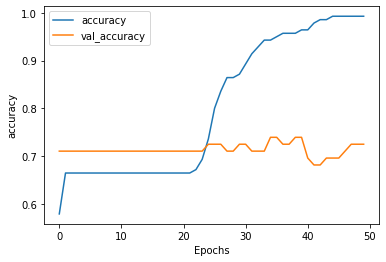

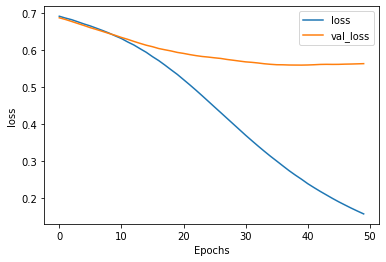

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
	# predict probabilities for test set
pred_test = model.predict(testing_padded)
pred_test = np.where(pred_test>=0.5, 1, 0) 
pred_test = pred_test.flatten()

In [ ]:
 tf.math.confusion_matrix(testing_labels, pred_test) 

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[44,  5],
       [14,  6]], dtype=int32)>

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[2]))
print(training_sentences[2])
print(labels[2])

asn sukarela pakai celana cingkrang pak ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
asn sukarela pakai celana cingkrang pak
1


In [ ]:
sentence = ["cingkrang cadar jelek benci asn goblok", "ulama setuju asn cingkrang", "saya tidak setuju asn cingkrang"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

[[0.39613473]
 [0.647123  ]
 [0.58242315]]
